# Exploração da base de dados anotada manualmente
## Carregamento dos arquivos

In [2]:
import pandas as pd

arquivo = "..//3_2_Anotacao_manual//Datasets_anotados_manual_final//Decisões anotação manual - ADJUDICADO.csv"
df = pd.read_csv( arquivo, encoding='utf-8' )
print( df.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   INDICE       1000 non-null   int64 
 1   TRIBUNAL     1000 non-null   object
 2   DISPOSITIVO  1000 non-null   object
 3   ROTULO       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None


### Conferindo datasets carregados

In [3]:
#aumenta o tamanho de exibição para poder ler o texto do dispositivo do acórdão
pd.set_option('display.max_colwidth', 300)

In [4]:
df.sample(3, random_state=1)

,INDICE,TRIBUNAL,DISPOSITIVO,ROTULO
507,199,TRT3,"Cabeçalho do acórdão Acórdão FUNDAMENTOS PELOS QUAIS, O Tribunal Regional do Trabalho da 3ª Região, pela sua Quarta Turma, na Sessão de Julgamento, Ordinária, realizada no dia 31 de janeiro de 2018, por unanimidade, conheceu do Recurso Ordinário interposto pelo Reclamante; no mérito, por maiori...",INDEFERIMENTO
818,932,TRT4,"Vistos, relatados e discutidos os autos. ACORDAM os Magistrados integrantes da 3ª Turma do Tribunal Regional do Trabalho da 4ª Região: por unanimidade, dar provimento parcial ao recurso da reclamante para, observada a prescrição pronunciada, condenar o Município-reclamado ao pagamento de difere...",DEFERIMENTO
452,2722,TRT4,"Vistos, relatados e discutidos os autos. ACORDAM os Magistrados integrantes da 1ª Turma do Tribunal Regional do Trabalho da 4ª Região: por unanimidade, REJEITAR OS EMBARGOS DE DECLARAÇÃO OPOSTOS PELO RECLAMANTE LUCIANO AGUIAR CAMARGO. Intime-se. Porto Alegre, 16 de maio de 2018 (quarta-feira)...",INDEFERIMENTO


### Removendo linhas sem label anotado

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   INDICE       1000 non-null   int64 
 1   TRIBUNAL     1000 non-null   object
 2   DISPOSITIVO  1000 non-null   object
 3   ROTULO       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.1+ KB


In [6]:
#limpeza de caracteres em branco
df["DISPOSITIVO"] = df["DISPOSITIVO"].astype(str).map(str.strip)

In [7]:
df_tudo = df
df_tudo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   INDICE       1000 non-null   int64 
 1   TRIBUNAL     1000 non-null   object
 2   DISPOSITIVO  1000 non-null   object
 3   ROTULO       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.1+ KB


## Labels nos datasets

In [8]:
df_tudo.ROTULO.unique()

array(['INDEFERIMENTO', 'DEFERIMENTO', 'SEM_ANALISE_MERITO'], dtype=object)

## Balanceamento das classes

In [9]:
df_tudo["ROTULO"].value_counts()

INDEFERIMENTO         539
DEFERIMENTO           441
SEM_ANALISE_MERITO     20
Name: ROTULO, dtype: int64

<AxesSubplot:>

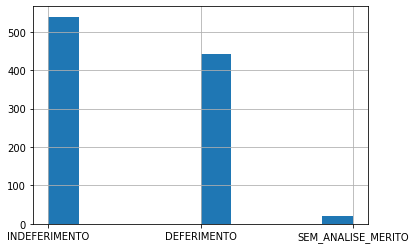

In [10]:
df_tudo["ROTULO"].hist()

### Contagens de palavras

In [91]:
df_tudo['DISPOSITIVO_CARACTERES'] = df_tudo['DISPOSITIVO'].astype(str).apply(len)
df_tudo['DISPOSITIVO_PALAVRAS'] = df_tudo['DISPOSITIVO'].apply(lambda x: len(str(x).split()))

In [92]:
df_tudo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   INDICE                  1000 non-null   int64 
 1   TRIBUNAL                1000 non-null   object
 2   DISPOSITIVO             1000 non-null   object
 3   ROTULO                  1000 non-null   object
 4   DISPOSITIVO_CARACTERES  1000 non-null   int64 
 5   DISPOSITIVO_PALAVRAS    1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 54.7+ KB


## Analise das variáveis

In [93]:
import plotly.graph_objects as go
from plotly.offline import iplot

x_TRT3 = df_tudo[df_tudo["TRIBUNAL"] == "TRT3"]["ROTULO"]
x_TRT4 = df_tudo[df_tudo["TRIBUNAL"] == "TRT4"]["ROTULO"]

fig = go.Figure( )

fig.add_trace(go.Histogram(
    x=x_TRT3,
    name="TRT 3ª Região",
    marker_color='#EB89B5' ))
fig.add_trace(go.Histogram(
    x=x_TRT4,
    name="TRT 4ª Região",
    marker_color='#330C73' ))

# Overlay both histograms
fig.update_layout(
    title='Histograma quantidade de acórdãos por classe anotada',
    #xaxis_title_text='Label anotado',
    yaxis_title_text='Quantidade',
    bargap=0.2,
    bargroupgap=0.1
    )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [94]:
import plotly.graph_objects as go

x_TRT3 = df_tudo[df_tudo["TRIBUNAL"] == "TRT3"]["DISPOSITIVO_CARACTERES"]
x_TRT4 = df_tudo[df_tudo["TRIBUNAL"] == "TRT4"]["DISPOSITIVO_CARACTERES"]

fig = go.Figure( )

fig.add_trace(go.Histogram(
    x=x_TRT3,
    name="TRT 3ª Região",
    marker_color='#EB89B5',
    nbinsx=5 ))
    
fig.add_trace(go.Histogram(
    x=x_TRT4,
    name="TRT 4ª Região",
    marker_color='#330C73',
    nbinsx=5 ))

# Overlay both histograms
fig.update_layout(
    title='Histograma quantidade de caracteres no dispositivo por tribunal',
    xaxis_title_text='Quantidade de caracteres',
    yaxis_title_text='Quantidade',
    bargap=0.2,
    bargroupgap=0.1
    )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [95]:
import plotly.graph_objects as go

BINS = 10

trt3_e_menor = (df_tudo["TRIBUNAL"] == "TRT3")# & (df_tudo["DISPOSITIVO_PALAVRAS"] < 1500)
trt4_e_menor = (df_tudo["TRIBUNAL"] == "TRT4")# & (df_tudo["DISPOSITIVO_PALAVRAS"] < 1500)

x_TRT3 = df_tudo[ trt3_e_menor ]["DISPOSITIVO_PALAVRAS"]
x_TRT4 = df_tudo[ trt4_e_menor ]["DISPOSITIVO_PALAVRAS"]

fig = go.Figure( )

fig.add_trace(go.Histogram(
    x=x_TRT3,
    name="TRT 3ª Região",
    marker_color='#EB89B5',
    nbinsx=BINS,
    histnorm='percent' ))
    
fig.add_trace(go.Histogram(
    x=x_TRT4,
    name="TRT 4ª Região",
    marker_color='#330C73',
    nbinsx=BINS,
    histnorm='percent' ))

# Overlay both histograms
fig.update_layout(
    title='Histograma quantidade de palavras no dispositivo por tribunal',
    xaxis_title_text='Quantidade de palavras',
    yaxis_title_text='Quantidade %',
    bargap=0.2,
    bargroupgap=0.1
    )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

### Ambos os tribunais utilizam em média 500 palavras no DISPOSITIVO

## Distribuição dos unigramas mais usadas depois de remover stop words

In [96]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rhuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ) ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_tudo['DISPOSITIVO'], 30)
df2 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
df2

,DISPOSITIVO,QUANTIDADE
0,acórdão,1918
1,trabalho,1662
2,turma,1075
3,regional,1059
4,provimento,1056
5,tribunal,1055
6,região,1011
7,unanimidade,959
8,cabeçalho,940
9,recurso,928


In [98]:
trace = go.Bar(x=df2["DISPOSITIVO"], y=df2["QUANTIDADE"])
iplot({"data":[trace]})

## Distribuição dos bigramas mais usadas depois de remover stop words

In [99]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ), ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_tudo['DISPOSITIVO'], 30)
df4 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
df4

,DISPOSITIVO,QUANTIDADE
0,regional trabalho,1008
1,tribunal regional,1003
2,cabeçalho acórdão,940
3,acórdão acórdão,896
4,recurso ordinário,572
5,exmo desembargador,519
6,4ª região,502
7,trabalho 4ª,501
8,magistrados integrantes,500
9,vistos relatados,497


In [100]:
trace = go.Bar(x=df4["DISPOSITIVO"], y=df4["QUANTIDADE"])
iplot({"data":[trace]})

## Distribuição dos trigramas mais usadas depois de remover stop words

In [101]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ), ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_tudo['DISPOSITIVO'], 20)
df6 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
df6

,DISPOSITIVO,QUANTIDADE
0,tribunal regional trabalho,999
1,cabeçalho acórdão acórdão,894
2,regional trabalho 4ª,501
3,trabalho 4ª região,501
4,vistos relatados discutidos,497
5,relatados discutidos autos,497
6,discutidos autos acordam,497
7,autos acordam magistrados,497
8,acordam magistrados integrantes,497
9,turma tribunal regional,483


In [102]:
trace = go.Bar(x=df6["DISPOSITIVO"], y=df6["QUANTIDADE"])
iplot({"data":[trace]})

## Distribuição dos unigramas mais usadas depois de remover stop words em relação a cada classe anotada

### Classe: DEFERIMENTO

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ) ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words( df_tudo.loc[ df_tudo["ROTULO"] == "DEFERIMENTO",'DISPOSITIVO' ], 20)
df1 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
print( df1 )

trace = go.Bar(x=df1["DISPOSITIVO"], y=df1["QUANTIDADE"])
iplot({"data":[trace]})

      DISPOSITIVO  QUANTIDADE
0         acórdão         850
1        trabalho         736
2      condenação         539
3      provimento         502
4           turma         470
5        regional         467
6        tribunal         463
7              00         460
8         recurso         450
9          região         444
10    unanimidade         420
11      cabeçalho         415
12          valor         415
13      pagamento         402
14  desembargador         363
15     reclamante         355
16      reclamada         340
17        parcial         330
18          autos         321
19           exmo         316


### Classe: INDEFERIMENTO

In [104]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ) ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words( df_tudo.loc[ df_tudo["ROTULO"] == "INDEFERIMENTO",'DISPOSITIVO' ], 30)
df2 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
print( df2 )

trace = go.Bar(x=df2["DISPOSITIVO"], y=df2["QUANTIDADE"])
iplot({"data":[trace]})

      DISPOSITIVO  QUANTIDADE
0         acórdão        1026
1        trabalho         875
2           turma         583
3        regional         570
4        tribunal         567
5      provimento         553
6          região         547
7     unanimidade         521
8       cabeçalho         505
9   desembargador         457
10        recurso         453
11           exmo         397
12          votos         357
13       presente         344
14         sessão         325
15     reclamante         324
16         mérito         318
17          maria         307
18          autos         292
19      realizada         291
20      ordinário         285
21             4ª         283
22        relator         274
23        acordam         273
24       terceira         270
25       conheceu         263
26          negou         262
27      ordinária         260
28    integrantes         254
29     julgamento         253


### Classe: SEM_ANALISE_MERITO

In [105]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ) ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words( df_tudo.loc[ df_tudo["ROTULO"] == "SEM_ANALISE_MERITO",'DISPOSITIVO' ], 30)
df2 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
print( df2 )

trace = go.Bar(x=df2["DISPOSITIVO"], y=df2["QUANTIDADE"])
iplot({"data":[trace]})

      DISPOSITIVO  QUANTIDADE
0        trabalho          51
1         acórdão          42
2        presente          28
3         justiça          26
4            exmo          26
5        tribunal          25
6         recurso          25
7      julgamento          23
8        regional          22
9           turma          22
10            art          22
11          votos          22
12  desembargador          22
13      cabeçalho          20
14         região          20
15    unanimidade          18
16           ação          18
17       cobrança          18
18         sessão          17
19     interposto          16
20          autos          16
21           belo          16
22          maria          16
23   advocatícios          16
24       processo          16
25    fundamentos          15
26      ordinária          15
27      realizada          15
28       conheceu          15
29      horizonte          15


## Distribuição dos bigramas mais usadas depois de remover stop words em relação a cada classe anotada

### Classe: DEFERIMENTO

In [106]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ), ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram( df_tudo.loc[ df_tudo["ROTULO"] == "DEFERIMENTO",'DISPOSITIVO' ], 30)
df4 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
print(df4)

trace = go.Bar(x=df4["DISPOSITIVO"], y=df4["QUANTIDADE"])
iplot({"data":[trace]})

                DISPOSITIVO  QUANTIDADE
0         regional trabalho         443
1         tribunal regional         442
2         cabeçalho acórdão         415
3           acórdão acórdão         397
4         recurso ordinário         282
5                    000 00         250
6                 4ª região         246
7               trabalho 4ª         245
8   magistrados integrantes         244
9          vistos relatados         241
10     relatados discutidos         241
11         discutidos autos         241
12            autos acordam         241
13      acordam magistrados         241
14           turma tribunal         241
15             porto alegre         226
16             intime porto         224
17          feira cabeçalho         224
18       exmo desembargador         218
19       região unanimidade         185
20        trabalho terceira         183
21          terceira região         183
22             horas extras         171
23         valor condenação         170


### Classe: INDEFERIMENTO

In [107]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ), ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram( df_tudo.loc[ df_tudo["ROTULO"] == "INDEFERIMENTO",'DISPOSITIVO' ], 30)
df4 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
print(df4)

trace = go.Bar(x=df4["DISPOSITIVO"], y=df4["QUANTIDADE"])
iplot({"data":[trace]})

                DISPOSITIVO  QUANTIDADE
0         regional trabalho         545
1         tribunal regional         541
2         cabeçalho acórdão         505
3           acórdão acórdão         482
4        exmo desembargador         284
5         recurso ordinário         282
6         trabalho terceira         267
7           terceira região         267
8          negou provimento         260
9          vistos relatados         251
10     relatados discutidos         251
11         discutidos autos         251
12            autos acordam         251
13      acordam magistrados         251
14  magistrados integrantes         251
15              trabalho 4ª         251
16                4ª região         251
17         negar provimento         245
18            região sessão         244
19           hoje realizada         243
20         sessão ordinária         239
21           turma tribunal         239
22       mérito divergência         237
23             porto alegre         227


### Classe: SEM_ANALISE_MERITO

In [108]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ), ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram( df_tudo.loc[ df_tudo["ROTULO"] == "SEM_ANALISE_MERITO",'DISPOSITIVO' ], 30)
df4 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
print(df4)

trace = go.Bar(x=df4["DISPOSITIVO"], y=df4["QUANTIDADE"])
iplot({"data":[trace]})

                 DISPOSITIVO  QUANTIDADE
0          cabeçalho acórdão          20
1          tribunal regional          20
2          regional trabalho          20
3            acórdão acórdão          17
4         exmo desembargador          17
5             belo horizonte          15
6        cobrança honorários          15
7          fundamentos quais          14
8             quais tribunal          14
9         ministério público          14
10          público trabalho          14
11             ação cobrança          14
12   honorários advocatícios          14
13         trabalho terceira          14
14           terceira região          14
15             região sessão          14
16          sessão ordinária          14
17                turma hoje          14
18            hoje realizada          14
19       acórdão fundamentos          12
20            agravo petição          11
21         presente processo          10
22      unanimidade conheceu           9
23           jul

## Distribuição dos trigramas mais usadas antes de remover stop words em relação a cada classe anotada

### Classe: DEFERIMENTO

In [109]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ), ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram( df_tudo.loc[ df_tudo["ROTULO"] == "DEFERIMENTO",'DISPOSITIVO' ], 20)
df6 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
print( df6 )

trace = go.Bar(x=df6["DISPOSITIVO"], y=df6["QUANTIDADE"])
iplot({"data":[trace]})


                        DISPOSITIVO  QUANTIDADE
0        tribunal regional trabalho         440
1         cabeçalho acórdão acórdão         395
2              regional trabalho 4ª         245
3                trabalho 4ª região         245
4       vistos relatados discutidos         241
5        relatados discutidos autos         241
6          discutidos autos acordam         241
7         autos acordam magistrados         241
8   acordam magistrados integrantes         241
9           turma tribunal regional         240
10              intime porto alegre         224
11          feira cabeçalho acórdão         224
12            4ª região unanimidade         185
13         trabalho terceira região         183
14       regional trabalho terceira         181
15           terceira região sessão         169
16          região sessão ordinária         151
17             turma hoje realizada         151
18           região unanimidade dar         135
19        acórdão fundamentos quais     

### Classe: INDEFERIMENTO

In [110]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ), ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram( df_tudo.loc[ df_tudo["ROTULO"] == "INDEFERIMENTO",'DISPOSITIVO' ], 20)
df6 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
print( df6 )

trace = go.Bar(x=df6["DISPOSITIVO"], y=df6["QUANTIDADE"])
iplot({"data":[trace]})


                        DISPOSITIVO  QUANTIDADE
0        tribunal regional trabalho         539
1         cabeçalho acórdão acórdão         482
2        regional trabalho terceira         267
3          trabalho terceira região         267
4       vistos relatados discutidos         251
5        relatados discutidos autos         251
6          discutidos autos acordam         251
7         autos acordam magistrados         251
8   acordam magistrados integrantes         251
9              regional trabalho 4ª         251
10               trabalho 4ª região         251
11           terceira região sessão         244
12          turma tribunal regional         239
13              intime porto alegre         226
14          feira cabeçalho acórdão         226
15            4ª região unanimidade         219
16          região sessão ordinária         217
17             turma hoje realizada         215
18     divergência negou provimento         214
19         mérito divergência negou     

### Classe: SEM_ANALISE_MERITO

In [111]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ), ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram( df_tudo.loc[ df_tudo["ROTULO"] == "SEM_ANALISE_MERITO",'DISPOSITIVO' ], 20)
df6 = pd.DataFrame(common_words, columns = ['DISPOSITIVO' , 'QUANTIDADE'])
print( df6 )

trace = go.Bar(x=df6["DISPOSITIVO"], y=df6["QUANTIDADE"])
iplot({"data":[trace]})


                         DISPOSITIVO  QUANTIDADE
0         tribunal regional trabalho          20
1          cabeçalho acórdão acórdão          17
2         fundamentos quais tribunal          14
3            quais tribunal regional          14
4        ministério público trabalho          14
5   cobrança honorários advocatícios          14
6         regional trabalho terceira          14
7           trabalho terceira região          14
8             terceira região sessão          14
9            região sessão ordinária          14
10              turma hoje realizada          14
11         acórdão fundamentos quais          12
12       acórdão acórdão fundamentos          11
13          ação cobrança honorários          11
14          julgou presente processo           9
15  representante ministério público           8
16    presidência exmo desembargador           8
17                hoje realizada sob           7
18         realizada sob presidência           7
19              sob 

## Distribuição da quantidade de palavras pela classes anotadas

In [112]:
df_tudo.groupby(["ROTULO", "TRIBUNAL"])["DISPOSITIVO_PALAVRAS"].describe()

count        mean         std   min    25%  \
ROTULO             TRIBUNAL                                               
DEFERIMENTO        TRT3      197.0  248.700508  295.974948  75.0  133.0   
                   TRT4      244.0  124.114754   57.205959  34.0   83.0   
INDEFERIMENTO      TRT3      288.0  182.069444  290.283477  43.0   98.0   
                   TRT4      251.0   53.434263   61.567253  35.0   44.0   
SEM_ANALISE_MERITO TRT3       15.0  290.733333  442.002499  95.0  103.0   
                   TRT4        5.0   84.800000   20.897368  64.0   69.0   

                               50%     75%     max  
ROTULO             TRIBUNAL                         
DEFERIMENTO        TRT3      161.0  219.00  2540.0  
                   TRT4      113.0  149.50   494.0  
INDEFERIMENTO      TRT3      112.0  133.25  2743.0  
                   TRT4       47.0   50.00   995.0  
SEM_ANALISE_MERITO TRT3      123.0  154.00  1572.0  
                   TRT4       84.0   90.00   117.0

In [113]:
#df_tudo.groupby(["ROTULO", "TRIBUNAL"])["DISPOSITIVO_CARACTERES", "DISPOSITIVO_PALAVRAS"].describe().to_csv( "dataset_anotado_describe_com_indice.csv", encoding='utf-8' )

### Interpretação: juízes escrevem menos PALAVRAS quando INDEFEREM um recurso em comparação com os recursos deferido.

# Termos característicos e suas associações
#### Tokenizador de palavras da lingua portuguesa e preparação do corpus no Scattertext

In [114]:
#conda install -c conda-forge scattertext
#conda install -c conda-forge spacy
#python -m spacy download pt_core_news_sm

import scattertext as st
import spacy
from spacy.tokens import Doc
from nltk.tokenize import RegexpTokenizer

def tokenize(text):
    """
    Tokenize the given sentence in Portuguese.
    :param text: text to be tokenized, as a string
    """
    tokenizer_regexp = r'''(?ux)
    # the order of the patterns is important!!
    # more structured patterns come first
    [a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+(?:\.[a-zA-Z0-9-]+)+|    # emails
    (?:https?://)?\w{2,}(?:\.\w{2,})+(?:/\w+)*|                  # URLs
    (?:[\#@]\w+)|                     # Hashtags and twitter user names
    (?:[^\W\d_]\.)+|                  # one letter abbreviations, e.g. E.U.A.
    (?:[DSds][Rr][Aa]?)\.|            # common abbreviations such as dr., sr., sra., dra.
    (?:\B-)?\d+(?:[:.,]\d+)*(?:-?\w)*|
        # numbers in format 999.999.999,999, possibly followed by hyphen and alphanumerics
        # \B- avoids picks as F-14 as a negative number
    \.{3,}|                           # ellipsis or sequences of dots
    \w+|                              # alphanumerics
    -+|                               # any sequence of dashes
    \S                                # any non-space character
    '''
    tokenizer = RegexpTokenizer(tokenizer_regexp)

    return tokenizer.tokenize(text)

class PortugueseTokenizer(object):
    def __init__(self, vocab):
        self.vocab = vocab

    def __call__(self, text):
        words = tokenize( text )
        # All tokens 'own' a subsequent space character in this tokenizer
        spaces = [True] * len(words)
        return Doc(self.vocab, words=words, spaces=spaces)

nlp = spacy.load("pt_core_news_sm")
nlp.tokenizer = PortugueseTokenizer(nlp.vocab)

corpus = st.CorpusFromPandas(df_tudo, category_col='ROTULO', text_col='DISPOSITIVO', nlp=nlp).build()

# Principais termos e suas associações para ambos os tribunais
## Palavras que diferenciam o corpus de acórdãos de um corpus comum da língua portuguesa

In [115]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['turma', 'provimento', 'unanimidade', 'trabalho', 'desembargador', 'exmo', 'reclamante', 'recurso', 'acordam', 'integrantes']


## Termos mais associados com os acórdãos anotados como DEFERIMENTO

In [116]:
import pprint

term_freq_df = corpus.get_term_freq_df()
term_freq_df['DEFERIMENTO Score'] = corpus.get_scaled_f_scores('DEFERIMENTO')
term_freq_df.sort_values(by='DEFERIMENTO Score', ascending=False).index[:10]
pprint.pprint( list( term_freq_df.sort_values(by='DEFERIMENTO Score', ascending=False).index[:10] ) )

['deu lhe',
 'dar provimento',
 'divergência deu',
 'dar',
 'unanimidade dar',
 'à condenação',
 'parcial',
 'condenar',
 'reflexos',
 'provimento para']


## Termos mais associados com os acórdãos anotados como INDEFERIMENTO

In [117]:
import pprint

term_freq_df = corpus.get_term_freq_df()
term_freq_df['INDEFERIMENTO Score'] = corpus.get_scaled_f_scores('INDEFERIMENTO')
term_freq_df.sort_values(by='INDEFERIMENTO Score', ascending=False).index[:10]
pprint.pprint( list( term_freq_df.sort_values(by='INDEFERIMENTO Score', ascending=False).index[:10] ) )

['divergência negou',
 'negou lhe',
 'negou',
 'negar',
 'negar provimento',
 'unanimidade negar',
 'embargos de',
 'de declaração',
 'embargos',
 'declaração']


## Termos mais associados com os acórdãos anotados como SEM_ANALISE_MERITO

In [118]:
import pprint

term_freq_df = corpus.get_term_freq_df()
term_freq_df['SEM_ANALISE_MERITO Score'] = corpus.get_scaled_f_scores('SEM_ANALISE_MERITO')
term_freq_df.sort_values(by='SEM_ANALISE_MERITO Score', ascending=False).index[:10]
pprint.pprint( list( term_freq_df.sort_values(by='SEM_ANALISE_MERITO Score', ascending=False).index[:10] ) )

['ação de',
 'de cobrança',
 'cobrança de',
 'cobrança',
 'comum',
 'competência',
 'não conheceu',
 'estadual',
 'justiça comum',
 'rel']


## Visualização dos termos e suas associações

In [119]:
html = st.produce_scattertext_explorer(corpus,
          category='DEFERIMENTO',
          category_name='DEFERIMENTO',
          not_category_name='INDEFERIMENTO',
          width_in_pixels=1000,
          metadata=df_tudo['DISPOSITIVO'])
open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))

3477625

# Principais termos e suas associações para o TRT da 3ª Região

In [120]:
corpus = st.CorpusFromPandas( df_tudo.loc[ df_tudo["TRIBUNAL"] == "TRT3", : ], category_col='ROTULO', text_col='DISPOSITIVO', nlp=nlp).build()

## Termos mais associados com os acórdãos anotados como DEFERIMENTO - TRT 3ª Região

In [121]:
import pprint

term_freq_df = corpus.get_term_freq_df()
term_freq_df['DEFERIMENTO Score'] = corpus.get_scaled_f_scores('DEFERIMENTO')
term_freq_df.sort_values(by='DEFERIMENTO Score', ascending=False).index[:10]
pprint.pprint( list( term_freq_df.sort_values(by='DEFERIMENTO Score', ascending=False).index[:10] ) )

['deu lhe',
 'divergência deu',
 'provimento para',
 'deu',
 'parcial provimento',
 'parcial',
 'reflexos',
 'determinar',
 '+',
 'da condenação']


## Termos mais associados com os acórdãos anotados como INDEFERIMENTO - TRT 3ª Região

In [122]:
import pprint

term_freq_df = corpus.get_term_freq_df()
term_freq_df['INDEFERIMENTO Score'] = corpus.get_scaled_f_scores('INDEFERIMENTO')
term_freq_df.sort_values(by='INDEFERIMENTO Score', ascending=False).index[:10]
pprint.pprint( list( term_freq_df.sort_values(by='INDEFERIMENTO Score', ascending=False).index[:10] ) )

['divergência negou',
 'negou lhe',
 'negou',
 'próprios',
 'r.',
 'lhe provimento',
 'embargos',
 'atividade',
 'embargos de',
 'substituindo']


## Termos mais associados com os acórdãos anotados como SEM_ANALISE_MERITO - TRT 3ª Região

In [123]:
import pprint

term_freq_df = corpus.get_term_freq_df()
term_freq_df['SEM_ANALISE_MERITO Score'] = corpus.get_scaled_f_scores('SEM_ANALISE_MERITO')
term_freq_df.sort_values(by='SEM_ANALISE_MERITO Score', ascending=False).index[:10]
pprint.pprint( list( term_freq_df.sort_values(by='SEM_ANALISE_MERITO Score', ascending=False).index[:10] ) )

['de cobrança',
 'ação de',
 'cobrança',
 'cobrança de',
 'comum',
 'competência',
 'não conheceu',
 'estadual',
 'justiça comum',
 'justiça estadual']


In [125]:
#html = st.produce_scattertext_explorer(corpus,
#          category='DEFERIMENTO',
#          category_name='DEFERIMENTO',
#          not_category_name='INDEFERIMENTO',
#          width_in_pixels=1000,
#          metadata=df_tudo['DISPOSITIVO'])
#open("Convention-Visualization_TRT3.html", 'wb').write(html.encode('utf-8'))

# Principais termos e suas associações para o TRT da 4ª Região

In [126]:
corpus = st.CorpusFromPandas( df_tudo.loc[ df_tudo["TRIBUNAL"] == "TRT4", : ], category_col='ROTULO', text_col='DISPOSITIVO', nlp=nlp).build()

## Termos mais associados com os acórdãos anotados como DEFERIMENTO - TRT 4ª Região

In [127]:
import pprint

term_freq_df = corpus.get_term_freq_df()
term_freq_df['DEFERIMENTO Score'] = corpus.get_scaled_f_scores('DEFERIMENTO')
term_freq_df.sort_values(by='DEFERIMENTO Score', ascending=False).index[:10]
pprint.pprint( list( term_freq_df.sort_values(by='DEFERIMENTO Score', ascending=False).index[:10] ) )

['de r',
 'honorários',
 'à condenação',
 'reais',
 '$',
 'r $',
 'r',
 'parcial',
 'dar',
 'dar provimento']


## Termos mais associados com os acórdãos anotados como INDEFERIMENTO - TRT 4ª Região

In [128]:
import pprint

term_freq_df = corpus.get_term_freq_df()
term_freq_df['INDEFERIMENTO Score'] = corpus.get_scaled_f_scores('INDEFERIMENTO')
term_freq_df.sort_values(by='INDEFERIMENTO Score', ascending=False).index[:10]
pprint.pprint( list( term_freq_df.sort_values(by='INDEFERIMENTO Score', ascending=False).index[:10] ) )

['negar',
 'negar provimento',
 'unanimidade negar',
 'embargos',
 'de declaração',
 'declaração',
 'embargos de',
 'provimento ao',
 'de 2017',
 'de 2018']


## Termos mais associados com os acórdãos anotados como SEM_ANALISE_MERITO - TRT 4ª Região

In [129]:
import pprint

term_freq_df = corpus.get_term_freq_df()
term_freq_df['SEM_ANALISE_MERITO Score'] = corpus.get_scaled_f_scores('SEM_ANALISE_MERITO')
term_freq_df.sort_values(by='SEM_ANALISE_MERITO Score', ascending=False).index[:10]
pprint.pprint( list( term_freq_df.sort_values(by='SEM_ANALISE_MERITO Score', ascending=False).index[:10] ) )

['restando',
 'romilda dos',
 'meneghini',
 'paulo gilberto',
 'gilberto souza',
 'souza meneghini',
 'friedrich',
 'santos friedrich',
 'romilda',
 'acolher a']


In [130]:
#html = st.produce_scattertext_explorer(corpus,
#          category='DEFERIMENTO',
#          category_name='DEFERIMENTO',
#          not_category_name='INDEFERIMENTO',
#          width_in_pixels=1000,
#          metadata=df_tudo['DISPOSITIVO'])
#open("Convention-Visualization_TRT4.html", 'wb').write(html.encode('utf-8'))